# Joseph Chew

## Research question/interests

I am interested in understanding how does the price and accommodation size relationship affect the review score.

In [13]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
#import missingno as ms

In [3]:

df = pd.read_csv ("../data/raw/listings.csv")


In [9]:
df

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1419,https://www.airbnb.com/rooms/1419,20210806113117,2021-08-06,Beautiful home in amazing area!,"This large, family home is located in one of T...",The apartment is located in the Ossington stri...,https://a0.muscache.com/pictures/76206750/d643...,1565,https://www.airbnb.com/users/show/1565,...,5.00,5.00,5.00,NaN,f,1,1,0,0,0.09
1,8077,https://www.airbnb.com/rooms/8077,20210806113117,2021-08-07,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,NaN,https://a0.muscache.com/pictures/11780344/141c...,22795,https://www.airbnb.com/users/show/22795,...,4.90,4.92,4.83,NaN,t,2,1,1,0,1.56
2,23691,https://www.airbnb.com/rooms/23691,20210806113117,2021-08-07,Queen Bedroom close to downtown,<b>The space</b><br />Nestled in the middle of...,NaN,https://a0.muscache.com/pictures/615528/d09ab3...,93825,https://www.airbnb.com/users/show/93825,...,4.93,4.34,4.73,NaN,t,2,0,2,0,1.79
3,27423,https://www.airbnb.com/rooms/27423,20210806113117,2021-08-07,Executive Studio Unit- Ideal for One Person,"Brand new, fully furnished studio basement apa...",NaN,https://a0.muscache.com/pictures/176936/b687ed...,118124,https://www.airbnb.com/users/show/118124,...,5.00,4.82,4.82,NaN,f,1,1,0,0,0.21
4,28160,https://www.airbnb.com/rooms/28160,20210806113117,2021-08-06,"Safe, Central, Quiet and Great Amenities!",NaN,Simply the best and safest neighbourhood in T....,https://a0.muscache.com/pictures/166666/71e95e...,86838,https://www.airbnb.com/users/show/86838,...,5.00,5.00,4.86,NaN,f,1,1,0,0,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15079,51492931,https://www.airbnb.com/rooms/51492931,20210806113117,2021-08-06,Spacious Studio Apartment Downtown Toronto Sma...,Very spacious cozy studio apartment. Located r...,The Kensington neighbourhood is defined by its...,https://a0.muscache.com/pictures/e7a25a9c-f8df...,311805447,https://www.airbnb.com/users/show/311805447,...,NaN,NaN,NaN,NaN,f,6,6,0,0,NaN
15080,51493223,https://www.airbnb.com/rooms/51493223,20210806113117,2021-08-06,Elegant One Bedroom Condo in Core Downtown,Beautiful one bedroom condo in Entertainment d...,NaN,https://a0.muscache.com/pictures/e90918d6-9268...,416677873,https://www.airbnb.com/users/show/416677873,...,NaN,NaN,NaN,NaN,t,4,4,0,0,NaN
15081,51493266,https://www.airbnb.com/rooms/51493266,20210806113117,2021-08-07,Bright large 2 bedrooms apt with separate entr...,Bright large 2 bedrooms apt with separate entr...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,259499767,https://www.airbnb.com/users/show/259499767,...,NaN,NaN,NaN,STR-2009-UDFHGC,f,5,3,2,0,NaN
15082,51493385,https://www.airbnb.com/rooms/51493385,20210806113117,2021-08-06,2 BR Condo Downtown with CN Tower View,Beautiful one bedroom condo in Entertainment d...,NaN,https://a0.muscache.com/pictures/f921100f-37dd...,416677873,https://www.airbnb.com/users/show/416677873,...,NaN,NaN,NaN,STR-2011-GDQKVF,f,4,4,0,0,NaN


             id                            listing_url       scrape_id  \
0          1419      https://www.airbnb.com/rooms/1419  20210806113117   
1          8077      https://www.airbnb.com/rooms/8077  20210806113117   
2         23691     https://www.airbnb.com/rooms/23691  20210806113117   
3         27423     https://www.airbnb.com/rooms/27423  20210806113117   
4         28160     https://www.airbnb.com/rooms/28160  20210806113117   
...         ...                                    ...             ...   
15079  51492931  https://www.airbnb.com/rooms/51492931  20210806113117   
15080  51493223  https://www.airbnb.com/rooms/51493223  20210806113117   
15081  51493266  https://www.airbnb.com/rooms/51493266  20210806113117   
15082  51493385  https://www.airbnb.com/rooms/51493385  20210806113117   
15083  51493427  https://www.airbnb.com/rooms/51493427  20210806113117   

      last_scraped                                               name  \
0       2021-08-06                    

In [16]:
#Task 1

In [28]:
df = pd.read_csv("../data/raw/listings.csv")
df.info()
df.head()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15084 entries, 0 to 15083
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            15084 non-null  int64  
 1   listing_url                                   15084 non-null  object 
 2   scrape_id                                     15084 non-null  int64  
 3   last_scraped                                  15084 non-null  object 
 4   name                                          15083 non-null  object 
 5   description                                   14598 non-null  object 
 6   neighborhood_overview                         9326 non-null   object 
 7   picture_url                                   15084 non-null  object 
 8   host_id                                       15084 non-null  int64  
 9   host_url                                      15084 non-null 

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

<AxesSubplot:xlabel='price', ylabel='count'>

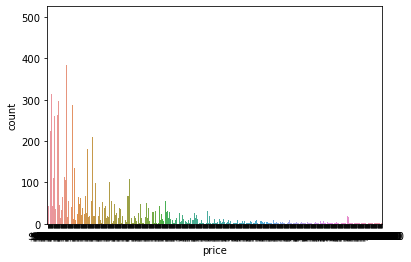

In [8]:
sns.countplot(x="price", data = df)

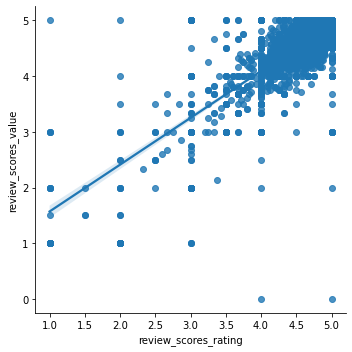

In [83]:
sns.lmplot(x='review_scores_rating', y='review_scores_value', data=df)

<AxesSubplot:>

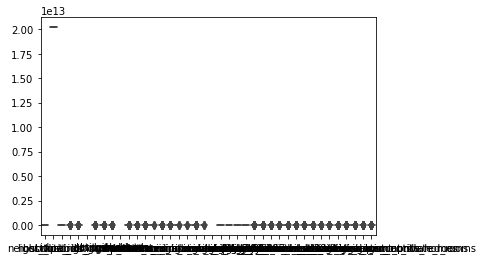

In [29]:
df.nunique(axis=0)
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,15084.000000,15084.000000,15084.000000,15077.000000,15077.000000,0.000000,15084.000000,15084.000000,15084.000000,0.000000,...,11437.000000,11434.000000,11434.000000,11433.000000,11434.000000,15084.000000,15084.000000,15084.000000,15084.000000,11609.000000
mean,29116306.871519,20210806113117.812500,119809289.570339,5.689593,5.689593,nan,43.681463,-79.397382,3.061787,nan,...,4.679526,4.835753,4.837102,4.825204,4.694973,4.329886,2.817224,1.354150,0.116945,1.340099
std,14650732.034674,0.812527,115703984.873553,18.884768,18.884768,nan,0.048682,0.065256,2.015330,nan,...,0.510812,0.383327,0.406078,0.336104,0.460011,8.432275,7.806021,3.192597,1.698709,3.584430
min,1419.000000,20210806113117.000000,1565.000000,0.000000,0.000000,nan,43.586740,-79.622620,0.000000,nan,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,17331240.250000,20210806113117.000000,22371065.000000,1.000000,1.000000,nan,43.645490,-79.425860,2.000000,nan,...,4.590000,4.830000,4.840000,4.780000,4.630000,1.000000,0.000000,0.000000,0.000000,0.160000
50%,30231058.500000,20210806113117.000000,76478633.500000,1.000000,1.000000,nan,43.663165,-79.397250,2.000000,nan,...,4.840000,4.960000,4.970000,4.930000,4.810000,1.000000,1.000000,0.000000,0.000000,0.510000
75%,42132381.000000,20210806113117.000000,201584938.000000,4.000000,4.000000,nan,43.702235,-79.376487,4.000000,nan,...,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,2.000000,1.000000,0.000000,1.430000
max,51493427.000000,20210806113117.000000,416677873.000000,272.000000,272.000000,nan,43.833170,-79.119670,16.000000,nan,...,5.000000,5.000000,5.000000,5.000000,5.000000,71.000000,71.000000,29.000000,34.000000,144.000000


In [11]:
df_temp = df[["id", 'name', 'host_id', 'host_name','price','accommodates', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']]
df_temp

,id,name,host_id,host_name,price,accommodates,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,1419,Beautiful home in amazing area!,1565,Alexandra,$469.00,10,5.00,5.00,5.00,5.00,5.00,5.00,5.00
1,8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,$94.00,2,4.84,4.81,4.89,4.87,4.90,4.92,4.83
2,23691,Queen Bedroom close to downtown,93825,Yohan & Sarah,$72.00,3,4.75,4.73,4.82,4.90,4.93,4.34,4.73
3,27423,Executive Studio Unit- Ideal for One Person,118124,Brent,$45.00,1,4.92,5.00,4.82,5.00,5.00,4.82,4.82
4,28160,"Safe, Central, Quiet and Great Amenities!",86838,Rita,$75.00,1,4.86,4.86,4.86,4.86,5.00,5.00,4.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15079,51492931,Spacious Studio Apartment Downtown Toronto Sma...,311805447,Anthony,$71.00,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15080,51493223,Elegant One Bedroom Condo in Core Downtown,416677873,Debashis,$109.00,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15081,51493266,Bright large 2 bedrooms apt with separate entr...,259499767,Sue,$106.00,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15082,51493385,2 BR Condo Downtown with CN Tower View,416677873,Debashis,$263.00,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df_temp.describe(include='object').T

,count,unique,top,freq
name,15083,14742,Private room in a shared hostel suite downtown,8
host_name,15077,4740,David,105
price,15084,620,$100.00,501


In [24]:
df_temp.describe(include='float64')

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,11609.000000,11435.000000,11437.000000,11434.000000,11434.000000,11433.000000,11434.000000
mean,4.650082,4.780028,4.679526,4.835753,4.837102,4.825204,4.694973
std,0.725082,0.430746,0.510812,0.383327,0.406078,0.336104,0.460011
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.630000,4.750000,4.590000,4.830000,4.840000,4.780000,4.630000
50%,4.840000,4.910000,4.840000,4.960000,4.970000,4.930000,4.810000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [30]:
df.nunique(axis=0)
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,15084.000000,15084.000000,15084.000000,15077.000000,15077.000000,0.000000,15084.000000,15084.000000,15084.000000,0.000000,...,11437.000000,11434.000000,11434.000000,11433.000000,11434.000000,15084.000000,15084.000000,15084.000000,15084.000000,11609.000000
mean,29116306.871519,20210806113117.812500,119809289.570339,5.689593,5.689593,nan,43.681463,-79.397382,3.061787,nan,...,4.679526,4.835753,4.837102,4.825204,4.694973,4.329886,2.817224,1.354150,0.116945,1.340099
std,14650732.034674,0.812527,115703984.873553,18.884768,18.884768,nan,0.048682,0.065256,2.015330,nan,...,0.510812,0.383327,0.406078,0.336104,0.460011,8.432275,7.806021,3.192597,1.698709,3.584430
min,1419.000000,20210806113117.000000,1565.000000,0.000000,0.000000,nan,43.586740,-79.622620,0.000000,nan,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,17331240.250000,20210806113117.000000,22371065.000000,1.000000,1.000000,nan,43.645490,-79.425860,2.000000,nan,...,4.590000,4.830000,4.840000,4.780000,4.630000,1.000000,0.000000,0.000000,0.000000,0.160000
50%,30231058.500000,20210806113117.000000,76478633.500000,1.000000,1.000000,nan,43.663165,-79.397250,2.000000,nan,...,4.840000,4.960000,4.970000,4.930000,4.810000,1.000000,1.000000,0.000000,0.000000,0.510000
75%,42132381.000000,20210806113117.000000,201584938.000000,4.000000,4.000000,nan,43.702235,-79.376487,4.000000,nan,...,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,2.000000,1.000000,0.000000,1.430000
max,51493427.000000,20210806113117.000000,416677873.000000,272.000000,272.000000,nan,43.833170,-79.119670,16.000000,nan,...,5.000000,5.000000,5.000000,5.000000,5.000000,71.000000,71.000000,29.000000,34.000000,144.000000


In [ ]:
#Task 2

In [75]:
#Removing columns that aren't necessary or won't be used
df_cleaned = df.copy().drop(['listing_url', 'picture_url', 'host_url', 'host_thumbnail_url', 'host_picture_url'], axis=1)

In [79]:
#Function to accepts threshold of missing values and removes it from the list
def rmissingvaluecol(df, threshold):
    l = []
    l = list(df.drop(df.loc[:,list((100*(df.isnull().sum()/len(df.index)) >= threshold))].columns, 1).columns.values)
    print("Number of columns having more than %s percent missing values: "%threshold, (df.shape[1] - len(l)))
    print("Columns:\n", list(set(list((df.columns.values))) - set(l)))
    return l

In [85]:
l = rmissingvaluecol(df_cleaned, 0.05)
df1 = df[l]

Number of columns having more than 0.05 percent missing values:  26
Columns:
 ['host_location', 'review_scores_communication', 'calendar_updated', 'description', 'license', 'bedrooms', 'reviews_per_month', 'bathrooms_text', 'last_review', 'review_scores_accuracy', 'host_neighbourhood', 'first_review', 'host_about', 'neighbourhood_group_cleansed', 'review_scores_location', 'host_response_time', 'review_scores_value', 'neighbourhood', 'host_acceptance_rate', 'beds', 'bathrooms', 'neighborhood_overview', 'review_scores_rating', 'review_scores_checkin', 'host_response_rate', 'review_scores_cleanliness']


<ipython-input-79-f21a6bc3c61c>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  l = list(df.drop(df.loc[:,list((100*(df.isnull().sum()/len(df.index)) >= threshold))].columns, 1).columns.values)


In [78]:
df1

,id,scrape_id,last_scraped,name,host_id,host_name,host_since,host_is_superhost,host_listings_count,host_total_listings_count,...,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,1419,20210806113117,2021-08-06,Beautiful home in amazing area!,1565,Alexandra,2008-08-08,f,1.0,1.0,...,0,2021-08-06,7,0,0,f,1,1,0,0
1,8077,20210806113117,2021-08-07,Downtown Harbourfront Private Room,22795,Kathie & Larry,2009-06-22,f,2.0,2.0,...,365,2021-08-07,169,0,0,t,2,1,1,0
2,23691,20210806113117,2021-08-07,Queen Bedroom close to downtown,93825,Yohan & Sarah,2010-03-15,f,2.0,2.0,...,365,2021-08-07,217,0,0,t,2,0,2,0
3,27423,20210806113117,2021-08-07,Executive Studio Unit- Ideal for One Person,118124,Brent,2010-05-04,f,1.0,1.0,...,159,2021-08-07,26,0,0,f,1,1,0,0
4,28160,20210806113117,2021-08-06,"Safe, Central, Quiet and Great Amenities!",86838,Rita,2010-03-01,f,3.0,3.0,...,345,2021-08-06,7,0,0,f,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15079,51492931,20210806113117,2021-08-06,Spacious Studio Apartment Downtown Toronto Sma...,311805447,Anthony,2019-11-24,f,3.0,3.0,...,62,2021-08-06,0,0,0,f,6,6,0,0
15080,51493223,20210806113117,2021-08-06,Elegant One Bedroom Condo in Core Downtown,416677873,Debashis,2021-08-03,f,0.0,0.0,...,151,2021-08-06,0,0,0,t,4,4,0,0
15081,51493266,20210806113117,2021-08-07,Bright large 2 bedrooms apt with separate entr...,259499767,Sue,2019-05-02,f,1.0,1.0,...,89,2021-08-07,0,0,0,f,5,3,2,0
15082,51493385,20210806113117,2021-08-06,2 BR Condo Downtown with CN Tower View,416677873,Debashis,2021-08-03,f,0.0,0.0,...,88,2021-08-06,0,0,0,f,4,4,0,0


In [82]:
df1.nunique(axis=0)
df1.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,minimum_nights,maximum_nights,...,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
count,15084.000000,15084.000000,15084.000000,15077.000000,15077.000000,15084.000000,15084.000000,15084.000000,15084.000000,15084.000000,...,15084.000000,15084.000000,15084.000000,15084.000000,15084.000000,15084.000000,15084.000000,15084.000000,15084.000000,15084.000000
mean,29116306.871519,20210806113117.812500,119809289.570339,5.689593,5.689593,43.681463,-79.397382,3.061787,27.427208,67003.091753,...,21.148767,35.939207,128.310130,25.836847,3.277446,0.401419,4.329886,2.817224,1.354150,0.116945
std,14650732.034674,0.812527,115703984.873553,18.884768,18.884768,0.048682,0.065256,2.015330,39.637649,8142193.725309,...,23.503441,36.101839,134.544809,52.503578,9.420179,1.344578,8.432275,7.806021,3.192597,1.698709
min,1419.000000,20210806113117.000000,1565.000000,0.000000,0.000000,43.586740,-79.622620,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,17331240.250000,20210806113117.000000,22371065.000000,1.000000,1.000000,43.645490,-79.425860,2.000000,28.000000,90.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,30231058.500000,20210806113117.000000,76478633.500000,1.000000,1.000000,43.663165,-79.397250,2.000000,28.000000,1125.000000,...,8.000000,31.000000,83.000000,5.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,42132381.000000,20210806113117.000000,201584938.000000,4.000000,4.000000,43.702235,-79.376487,4.000000,28.000000,1125.000000,...,41.000000,69.000000,243.000000,26.000000,2.000000,0.000000,4.000000,2.000000,1.000000,0.000000
max,51493427.000000,20210806113117.000000,416677873.000000,272.000000,272.000000,43.833170,-79.119670,16.000000,1125.000000,999999999.000000,...,60.000000,90.000000,365.000000,828.000000,183.000000,17.000000,71.000000,71.000000,29.000000,34.000000
